## Example of class
A class for [Conway's game of life automaton](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life):

But first a quick reminder of some basic operations:

In [3]:
a = 1
a += 1 # a = a + 1
a *= 2 # a = a * 2
# | # bitwise or
3 | 4
# 4 = 1 0 0 ; 3 = 0 1 1
# 4 | 3 = 1 1 1 = 7

7

In [1]:
from scipy.signal import convolve2d
import numpy as np
import matplotlib.pyplot as plt

class GameOfLife:
    # That Kernel defines how to count the number of neighbors
    kernel = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])

    def iteration(self):
        """
        Run one iteration of the automaton and update the current state with its new value
        """
        # Counting the neighbors
        nb_neighbs = convolve2d(self.current_state, self.kernel, boundary='wrap', mode='same')
        
        # Checking the rules:
        #   Any live cell with two or three live neighbours survives.
        #   Any dead cell with three live neighbours becomes a live cell.
        #   All other live cells die in the next generation. Similarly, all other dead cells stay dead.
        new_live  = ((nb_neighbs == 3) | (nb_neighbs == 2)) & self.current_state
        new_live |= ((nb_neighbs == 3) & (~self.current_state))
        self.current_state = new_live

    def plot(self):
        """
        Plot the current state of the automaton
        """
        fig, ax = plt.subplots()
        ax.imshow(self.current_state, interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.tight_layout()
        plt.show()
    
    def __init__(self, initial_state):
        self.initial_state = initial_state
        self.current_state = initial_state

(4, 6)

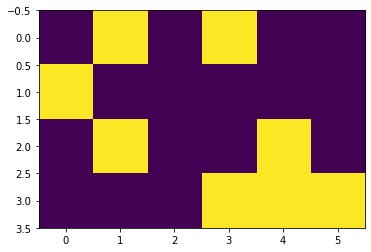

In [7]:
init_state = np.array(
    [
        [0, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 1, 1, 1]
    ], dtype=int
)
plt.imshow(init_state, interpolation='nearest')

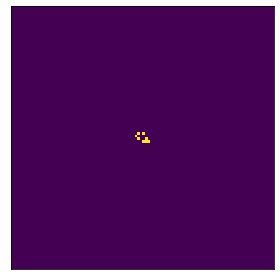

In [29]:
size = 100
init_state_large = np.zeros((size, size), dtype=bool)
init_state_large[size//2-2:size//2+2, size//2-3:size//2+3] = init_state
game_of_life = GameOfLife(init_state_large)
game_of_life.plot()

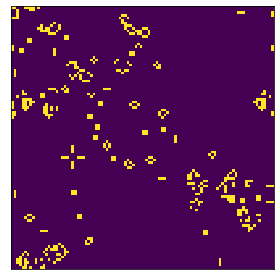

In [30]:
for i in range(1000):
    game_of_life.iteration()
game_of_life.plot()

In [66]:
class GameOfLife:
    kernel = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])
    def iteration(self):
        # Counting the neighbors
        nb_neighbs = convolve2d(self.current_state, self.kernel, boundary='wrap', mode='same')
        
        # Checking the rules:
        #   Any live cell with two or three live neighbours survives.
        #   Any dead cell with three live neighbours becomes a live cell.
        #   All other live cells die in the next generation. Similarly, all other dead cells stay dead.
        new_live = np.zeros_like(nb_neighbs, dtype=bool)
        for th in self.th_live:
            new_live |= (nb_neighbs == th) & self.current_state
        for th in self.th_dead:
            new_live |= ((nb_neighbs == th) & (~self.current_state))
        self.current_state = new_live

    def plot(self):
        fig, ax = plt.subplots()
        ax.imshow(self.current_state, interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.tight_layout()
        plt.show()
    
    def __init__(self, initial_state, th_live=[2, 3], th_dead=[3]):
        self.initial_state = initial_state.astype(bool)
        self.current_state = initial_state.astype(bool)
        self.th_live = th_live
        self.th_dead = th_dead

In [83]:
game_of_life2 = GameOfLife(init_state_large, th_live=[2, 3], th_dead=[3])

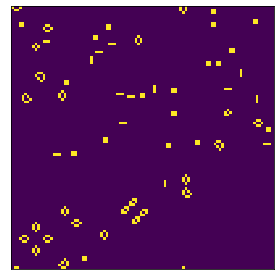

In [669]:
for i in range(10):
    game_of_life2.iteration()
game_of_life2.plot()